In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [151]:
dataset = pd.read_json('../data/raw/company_info.jsonl', lines=True)
# Stel de eerste rij in als kolomnamen
dataset.columns = dataset.iloc[0]

# Verwijder de eerste rij (die nu als kolomnamen is ingesteld)
dataset = dataset[1:]

# Herstel de index van de DataFrame
dataset = dataset.reset_index(drop=True)
dataset = dataset.dropna()

In [152]:
selected_columns = ['start_year', 'nace1', 'nace2', 'nace3', 'nace4', 'capital', 'company_type']
numeric_data = dataset[selected_columns].dropna()
# Bewaar de originele index
original_index = numeric_data.index

In [153]:
# Stap 3: Standaardiseer de gegevens
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

In [154]:
# Reduceer de data naar 2 dimensies met PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Zet PCA-componenten om naar DataFrame
pca_components = pd.DataFrame(X_pca, columns=['PCA_Component_1', 'PCA_Component_2'])


In [155]:
# Voeg de PCA-componenten toe aan de DataFrame van originele gegevens
filtered_original_data = numeric_data.copy()
filtered_original_data['PCA_Component_1'] = pca_components['PCA_Component_1']
filtered_original_data['PCA_Component_2'] = pca_components['PCA_Component_2']
# Zet de originele index terug
filtered_original_data.index = original_index

In [156]:
# Filter de oorspronkelijke data op basis van PCA-componenten (bijvoorbeeld PCA_Component_1 > 50)
filtered_data = filtered_original_data[filtered_original_data['PCA_Component_1'] < 50]

In [157]:
n_clusters = 5  # Stel het gewenste aantal clusters in
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_pca)
labels_pca = kmeans.labels_

# Voeg de labels toe aan de DataFrame voor visualisatie
filtered_original_data['Cluster'] = labels_pca

c:\Users\fwi11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


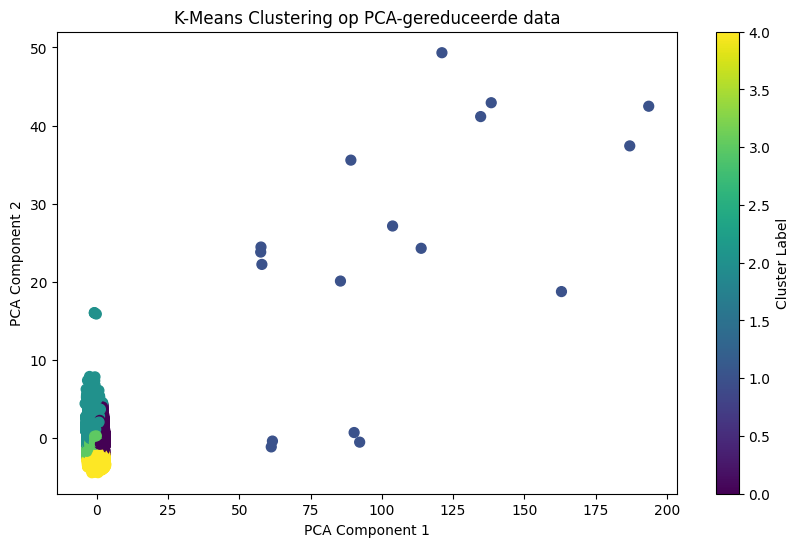

In [158]:
# Visualiseer de clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=50, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering op PCA-gereduceerde data')
plt.colorbar(label='Cluster Label')
plt.show()

In [159]:
# Filter de data waarbij PCA_Component_1 groter is dan 50
filtered_data_pca = pca_components[pca_components['PCA_Component_1'] > 25]

In [160]:
# Stel dat X_pca de getransformeerde gegevens zijn na het toepassen van PCA
pca_components = pd.DataFrame(X_pca, columns=['PCA_Component_1', 'PCA_Component_2'])
print (pca_components)

        PCA_Component_1  PCA_Component_2
0              1.331373         0.182425
1             -0.360533        -0.011211
2              1.040672        -0.281056
3             -0.684297        -0.535570
4              0.353330         0.011007
...                 ...              ...
236455         0.055145        -0.384326
236456         1.219268        -0.738311
236457        -0.226171         0.309791
236458        -0.839256         0.268109
236459         1.494974        -2.940685

[236460 rows x 2 columns]


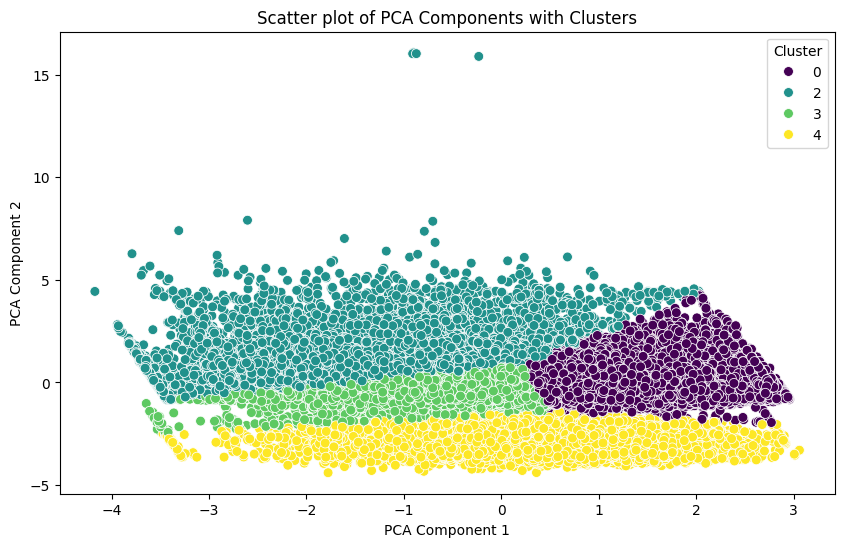

In [165]:
filtered_original_data['Cluster'] = labels_pca
# Filter de data waar PCA_Component_1 kleiner is dan 25
filtered_original_data = filtered_original_data[filtered_original_data['PCA_Component_1'] <25]
# Maak een scatter plot van de gefilterde data met clusters in verschillende kleuren
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA_Component_1', 
    y='PCA_Component_2', 
    hue='Cluster', 
    palette='viridis', 
    data=filtered_original_data, 
    s=50
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter plot of PCA Components with Clusters')
plt.legend(title='Cluster')
plt.show()

In [162]:
original_data_approx = pca.inverse_transform(X_pca)

original_columns = ['start_year', 'nace1', 'nace2', 'nace3', 'nace4', 'capital', 'company_type']  # Gebruik hier de namen van je originele kolommen
filtered_original_data = pd.DataFrame(original_data_approx, columns=original_columns)

# Voeg de PCA-componenten toe aan het DataFrame voor referentie
filtered_original_data['PCA_Component_1'] = pca_components['PCA_Component_1']
filtered_original_data['PCA_Component_2'] = pca_components['PCA_Component_2']
filtered_original_data['Cluster'] = labels_pca

# Filter de oorspronkelijke data op basis van PCA-componenten (bijvoorbeeld PCA_Component_1 > 50)
filtered_data = filtered_original_data[filtered_original_data['PCA_Component_1'] > 50]

# # Print de eerste 20 regels van de gefilterde oorspronkelijke data
# print(filtered_data.head(20))

print (filtered_data.index)

Index([  3397,   8873,   9470,  21877,  24169,  30834,  38473,  53294,  66386,
        85032,  88419, 113209, 178008, 182375, 199487, 214069, 217598],
      dtype='int64')
